Literary Prizes EDA

During this step of your capstone, you'll become familiar with the features of your dataset, investigate the relationships between features, and begin to understand the core characteristics of your data. Tap into your creativity and consider using different figures and plots to deepen this understanding. 

In [64]:
#import packages

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale


In [65]:
#Load the file

df = pd.read_csv('winners_cleaned2.csv')

In [66]:
df.describe()

,Unnamed: 0,person_id,prize_year,prize_amount
count,2776.000000,2776.000000,2776.000000,2776.000000
mean,3789.930115,1217.021614,1992.881124,49106.556196
std,1938.359678,703.043798,21.419153,94582.002975
min,2.000000,1.000000,1918.000000,10000.000000
25%,2237.750000,611.000000,1981.000000,10000.000000
50%,3808.000000,1198.500000,1998.000000,15000.000000
75%,5586.250000,1846.500000,2010.000000,50000.000000
max,7041.000000,2410.000000,2020.000000,625000.000000


In [67]:
df.head()

,Unnamed: 0,person_id,full_name,given_name,last_name,gender,elite_institution,graduate_degree,mfa_degree,stegner,role,prize_institution,prize_name,prize_year,prize_genre,prize_type,prize_amount,title_of_winning_book
0,2,1891,Reuben Bercovitch,Reuben,Bercovitch,unknown,NaN,NaN,NaN,NaN,winner,PEN America,Hemingway Award for Debut Novel,1979,prose,book,10000.0,Hasen
1,3,1807,Pauline Hanson,Pauline,Hanson,unknown,NaN,NaN,NaN,NaN,winner,American Academy of Arts and Letters,Arts and Letters Awards,1972,no genre,career,10000.0,NaN
2,4,1032,Jean Valentine,Jean,Valentine,female,Radcliffe College,graduate,NaN,NaN,winner,Yale University,Bollingen Prize for Poetry,2017,poetry,career,10000.0,NaN
3,5,123,Andrea Lawlor,Andrea,Lawlor,nonbinary/they,NaN,graduate,"University of Massachusetts, Amherst",NaN,winner,Whiting Foundation,Whiting Award,2020,no genre,career,50000.0,NaN
4,6,1295,Kayleb Rae Candrilli,Kayleb Rae,Candrilli,nonbinary/they,NaN,graduate,University of Alabama,NaN,winner,Whiting Foundation,Whiting Award,2019,no genre,career,50000.0,NaN


In [68]:
df.person_id.nunique()

1773

In [69]:
df.full_name.nunique()

1772

In [70]:
#Replacing 'None' with NaN so that there is no discrepency

df.replace('None', np.nan, inplace=True)

In [71]:
#Checking to see that 'None' is gone as a value

df.elite_institution.value_counts()

Harvard University                                                        253
Columbia University                                                       188
Stanford University                                                       134
Yale University                                                            91
Princeton University                                                       61
University of Chicago                                                      47
Brown University                                                           44
Cornell University                                                         37
Radcliffe College                                                          29
University of Pennsylvania                                                 27
Barnard College                                                            24
Dartmouth College                                                          18
Harvard University, Columbia University                         

In [72]:
#Checking to see if all the 'None's have been replaced

print(df[df['full_name']=='Leslie Marmon Silko'])

      Unnamed: 0  person_id            full_name     given_name last_name  \
2704        6840       1387  Leslie Marmon Silko  Leslie Marmon     Silko   
2705        6841       1387  Leslie Marmon Silko  Leslie Marmon     Silko   
2706        6842       1387  Leslie Marmon Silko  Leslie Marmon     Silko   
2707        6843       1387  Leslie Marmon Silko  Leslie Marmon     Silko   

      gender elite_institution graduate_degree mfa_degree stegner    role  \
2704  female               NaN             NaN        NaN     NaN  winner   
2705  female               NaN             NaN        NaN     NaN  winner   
2706  female               NaN             NaN        NaN     NaN  winner   
2707  female               NaN             NaN        NaN     NaN  winner   

                         prize_institution  \
2704  American Academy of Arts and Letters   
2705  American Academy of Arts and Letters   
2706                     Lannan Foundation   
2707                  MacArthur Foundation  

Need to clean the data more. Looks like there are some None's in the elite institution, graduate dgree, mfa degree, stegner. Should I change NaN to None? Or None to NaN? Maybe NaN and then create subsets of the those with and without each of the features.

In [73]:
career_elite = df.groupby(['full_name', 'elite_institution'])['prize_amount'].sum().sort_values(ascending=False).reset_index()
print(career_elite, )

                full_name                        elite_institution  \
0              John Keene                       Harvard University   
1         Claudia Rankine                      Columbia University   
2           Adrienne Rich                        Radcliffe College   
3             Robert Hass                      Stanford University   
4            John Ashbery  Harvard University, Columbia University   
..                    ...                                      ...   
630        Rachel Ingalls                        Radcliffe College   
631  Hannahlillith Assadi                      Columbia University   
632         Ralph Manheim                       Harvard University   
633       Gregory Rabassa   Dartmouth College, Columbia University   
634         Joseph Heller                      Columbia University   

     prize_amount  
0       1010000.0  
1        945000.0  
2        920000.0  
3        755000.0  
4        755000.0  
..            ...  
630       10000.0  

In [74]:
elite = df.groupby( 'elite_institution')['prize_amount'].sum().sort_values(ascending=False).reset_index()
print(elite)

                                    elite_institution  prize_amount
0                                  Harvard University    11986600.0
1                                 Columbia University     9717400.0
2                                 Stanford University     6165600.0
3                                     Yale University     3336600.0
4                                Princeton University     2965800.0
5                               University of Chicago     2805800.0
6                                    Brown University     2664000.0
7                                  Cornell University     2441600.0
8                          University of Pennsylvania     1795800.0
9                                     Barnard College     1770000.0
10                                  Radcliffe College     1510000.0
11                                  Dartmouth College     1060000.0
12            Harvard University, Columbia University      935000.0
13                  Barnard College, Brown Unive

In [75]:
career_degree = df.groupby(['full_name', 'graduate_degree'])['prize_amount'].sum().reset_index()
print(career_degree)

             full_name graduate_degree  prize_amount
0      A. E. Stallings        graduate      570000.0
1       A. G. Mojtabai        graduate       20000.0
2       A. J. Verdelle        graduate       70000.0
3         A. R. Ammons        graduate      900000.0
4          Achy Obejas        graduate       50000.0
...                ...             ...           ...
1120  Yusef Komunyakaa        graduate      325000.0
1121      Yvor Winters        graduate       20000.0
1122  Yxta Maya Murray        graduate       50000.0
1123      Z. Z. Packer        graduate       50000.0
1124     Zachary Lazar        graduate       20000.0

[1125 rows x 3 columns]


In [76]:
career_mfa = df.groupby(['full_name', 'mfa_degree'])['prize_amount'].sum().sort_values(ascending=False).reset_index()
print(career_mfa)

              full_name                mfa_degree  prize_amount
0            John Keene       New York University     1010000.0
1       Claudia Rankine       Columbia University      945000.0
2       Edward P. Jones    University of Virginia      835000.0
3              Yiyun Li        University of Iowa      820000.0
4        Terrance Hayes  University of Pittsburgh      755000.0
..                  ...                       ...           ...
527         Neil Labute       New York University       10000.0
528     David Ebershoff     University of Chicago       10000.0
529       Naomi Wallace        University of Iowa       10000.0
530          David Long     University of Montana       10000.0
531  Daniyal Mueenuddin     University of Arizona       10000.0

[532 rows x 3 columns]


In [77]:
mfa = df.groupby('mfa_degree')['prize_amount'].sum().sort_values(ascending=False).reset_index()
print(mfa)

                            mfa_degree  prize_amount
0                   University of Iowa    13394000.0
1                  Columbia University     4192400.0
2                  New York University     3518200.0
3                     Brown University     1875000.0
4               University of Michigan     1447400.0
..                                 ...           ...
86               University of Chicago       10000.0
87                     Goucher College       10000.0
88               Vanderbilt University       10000.0
89  School of Art Institute of Chicago       10000.0
90          Louisiana State University       10000.0

[91 rows x 2 columns]


In [78]:
#slice out the top 10 MFA programs
top_mfa = mfa[:10]
top_mfa = top_mfa.set_index('mfa_degree')
print(top_mfa.head(20))

                          prize_amount
mfa_degree                            
University of Iowa          13394000.0
Columbia University          4192400.0
New York University          3518200.0
Brown University             1875000.0
University of Michigan       1447400.0
Cornell University           1396600.0
Johns Hopkins University     1286600.0
University of Virginia       1071600.0
University of Arkansas        910800.0
University of Pittsburgh      785000.0


In [79]:
#slice out everyone else
rest_mfa = mfa[10:]
rest_mfa = rest_mfa.set_index('mfa_degree')
print(len(rest_mfa))
print(rest_mfa.head())

81
                                          prize_amount
mfa_degree                                            
Univeristy of California, Irvine              760000.0
University of Arizona                         750800.0
Old Dominion University                       725000.0
Warren Wilson College                         691600.0
University of North Carolina, Greensboro      685000.0


In [80]:
other = {'Every other MFA': rest_mfa.prize_amount.sum()}
print(other)

{'Every other MFA': 13268800.0}


In [81]:
top_other = top_mfa
top_other.loc['Every Other MFA'] = 13268800

In [82]:
y=top_mfa.index

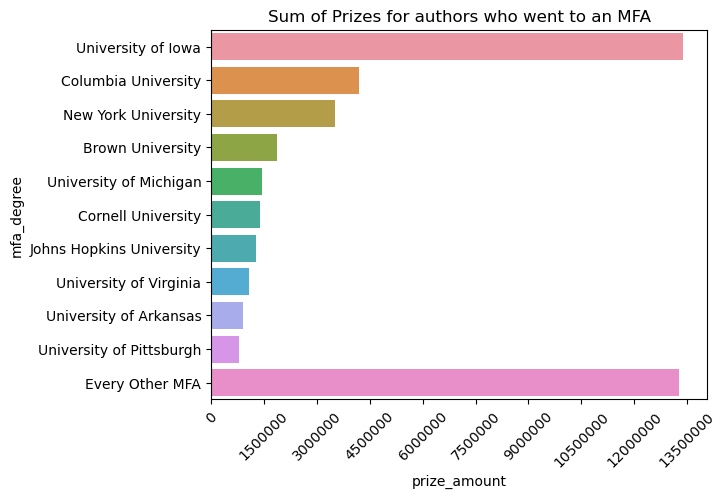

In [83]:
sns.barplot(top_mfa, x='prize_amount', y=y)
plt.title('Sum of Prizes for authors who went to an MFA')
plt.xticks(np.arange(0.0,14000000.0, 1500000.))
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=45)
plt.show()

array([<Axes: ylabel='prize_amount'>], dtype=object)

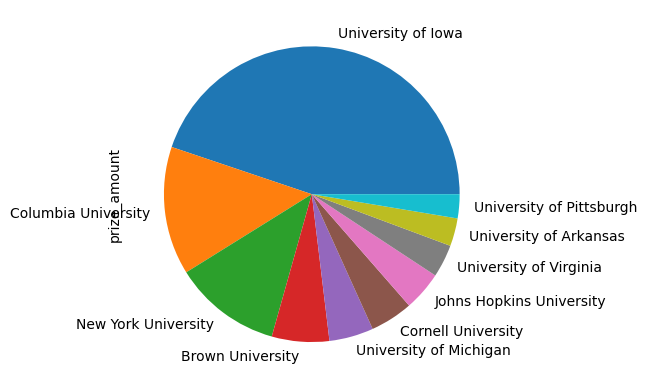

In [84]:
#Pie chart of the distribution of sums of prize amounts for top 10 MFA program winners

df.groupby('mfa_degree')['prize_amount'].sum().sort_values(ascending=False)[:10].plot(kind='pie', subplots=True)

Text(0.5, 1.0, 'Pie chart of total winnings for Top 10 MFA Programs and Every other MFA')

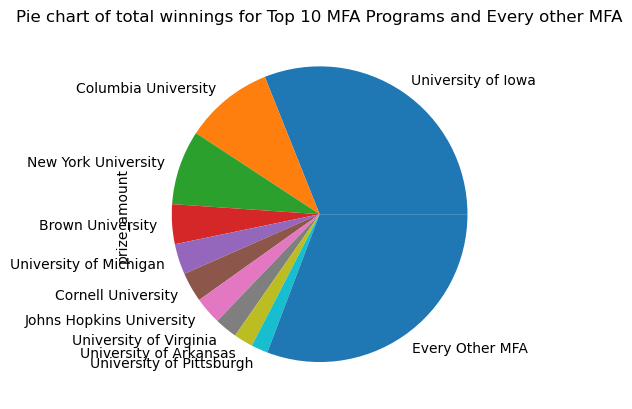

In [85]:
top_other['prize_amount'].plot(kind='pie', subplots=True)
plt.title('Pie chart of total winnings for Top 10 MFA Programs and Every other MFA')

/var/folders/2s/11ldfx_j2c9237b89l98fmdr0000gn/T/ipykernel_56521/703126535.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('person_id').agg('sum').plot(kind='bar', y='prize_amount')


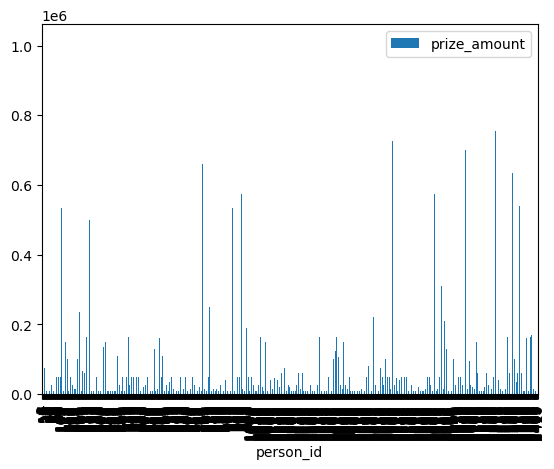

In [86]:
#This is a bar graph showing each author's total sum winnings

df.groupby('person_id').agg('sum').plot(kind='bar', y='prize_amount')
plt.show()

In [87]:
#Need to get just MFA people so drop anyone without an MFA
df_filtered=df.dropna(subset=['mfa_degree'])

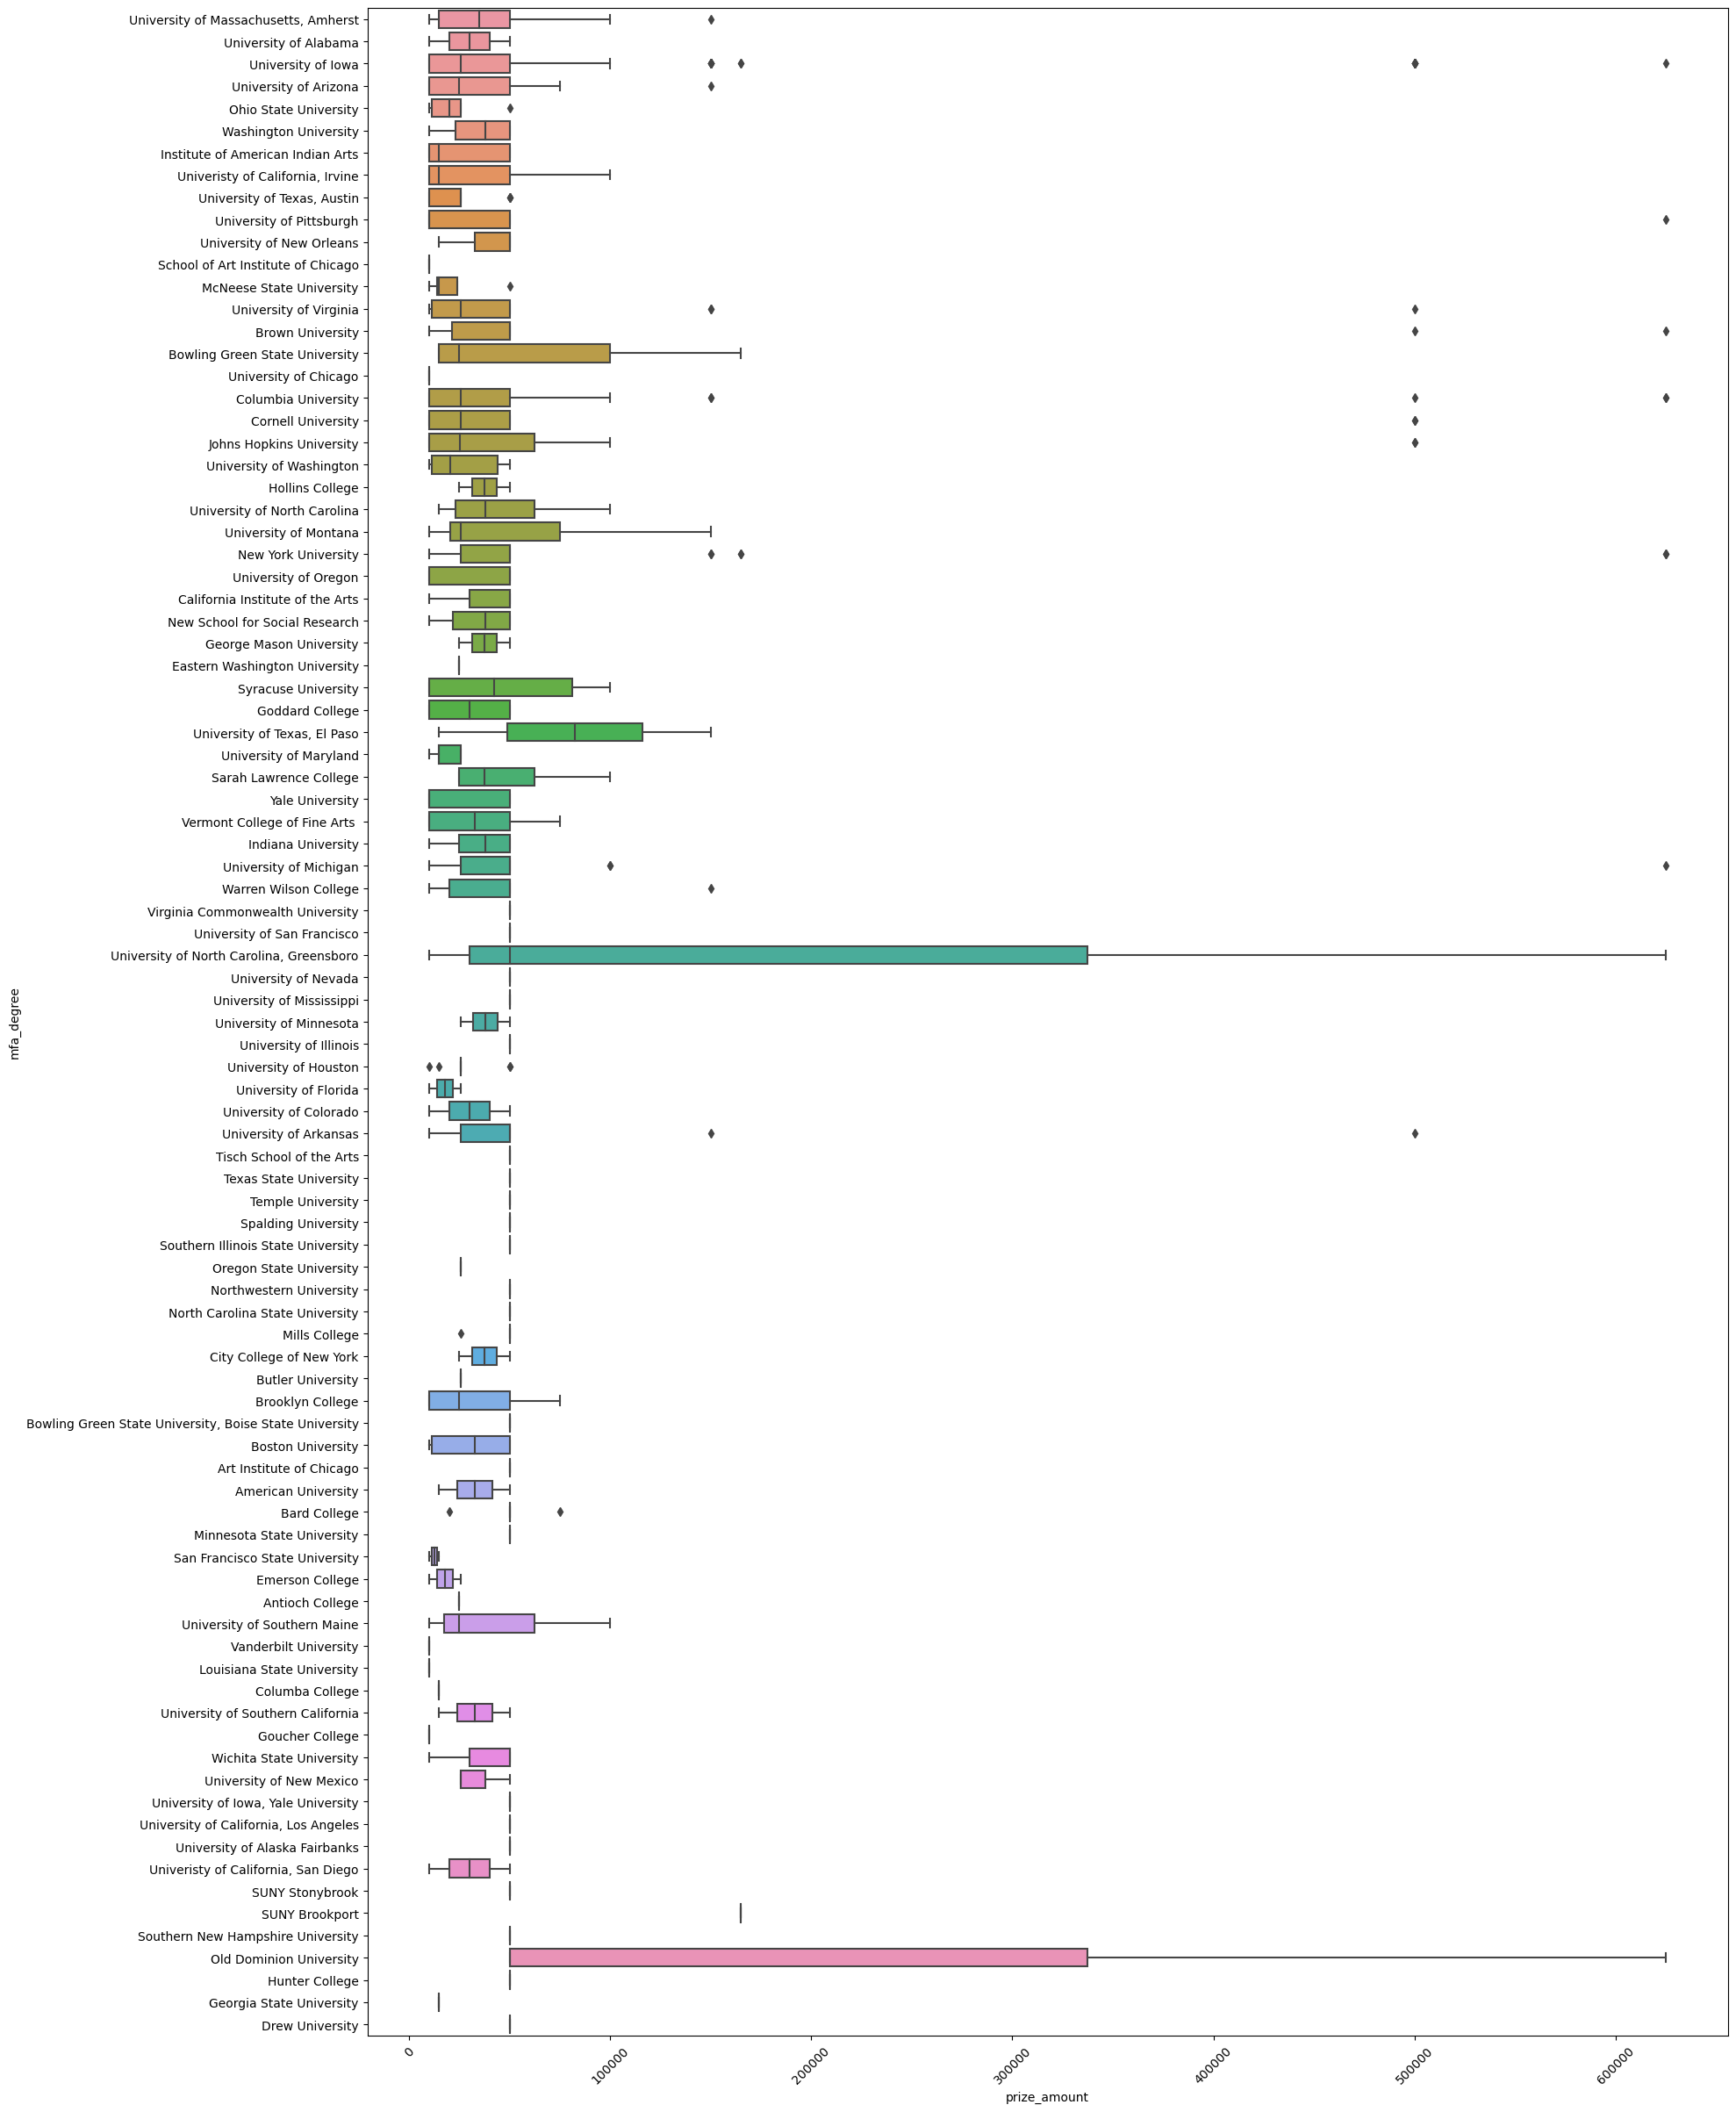

In [88]:
#Box and whisker plots of every MFA program's distributions of prize awards

plt.figure(figsize=(20,30))
sns.boxplot(data=df_filtered, x='prize_amount', y='mfa_degree')
plt.xticks(rotation=45)
plt.show()

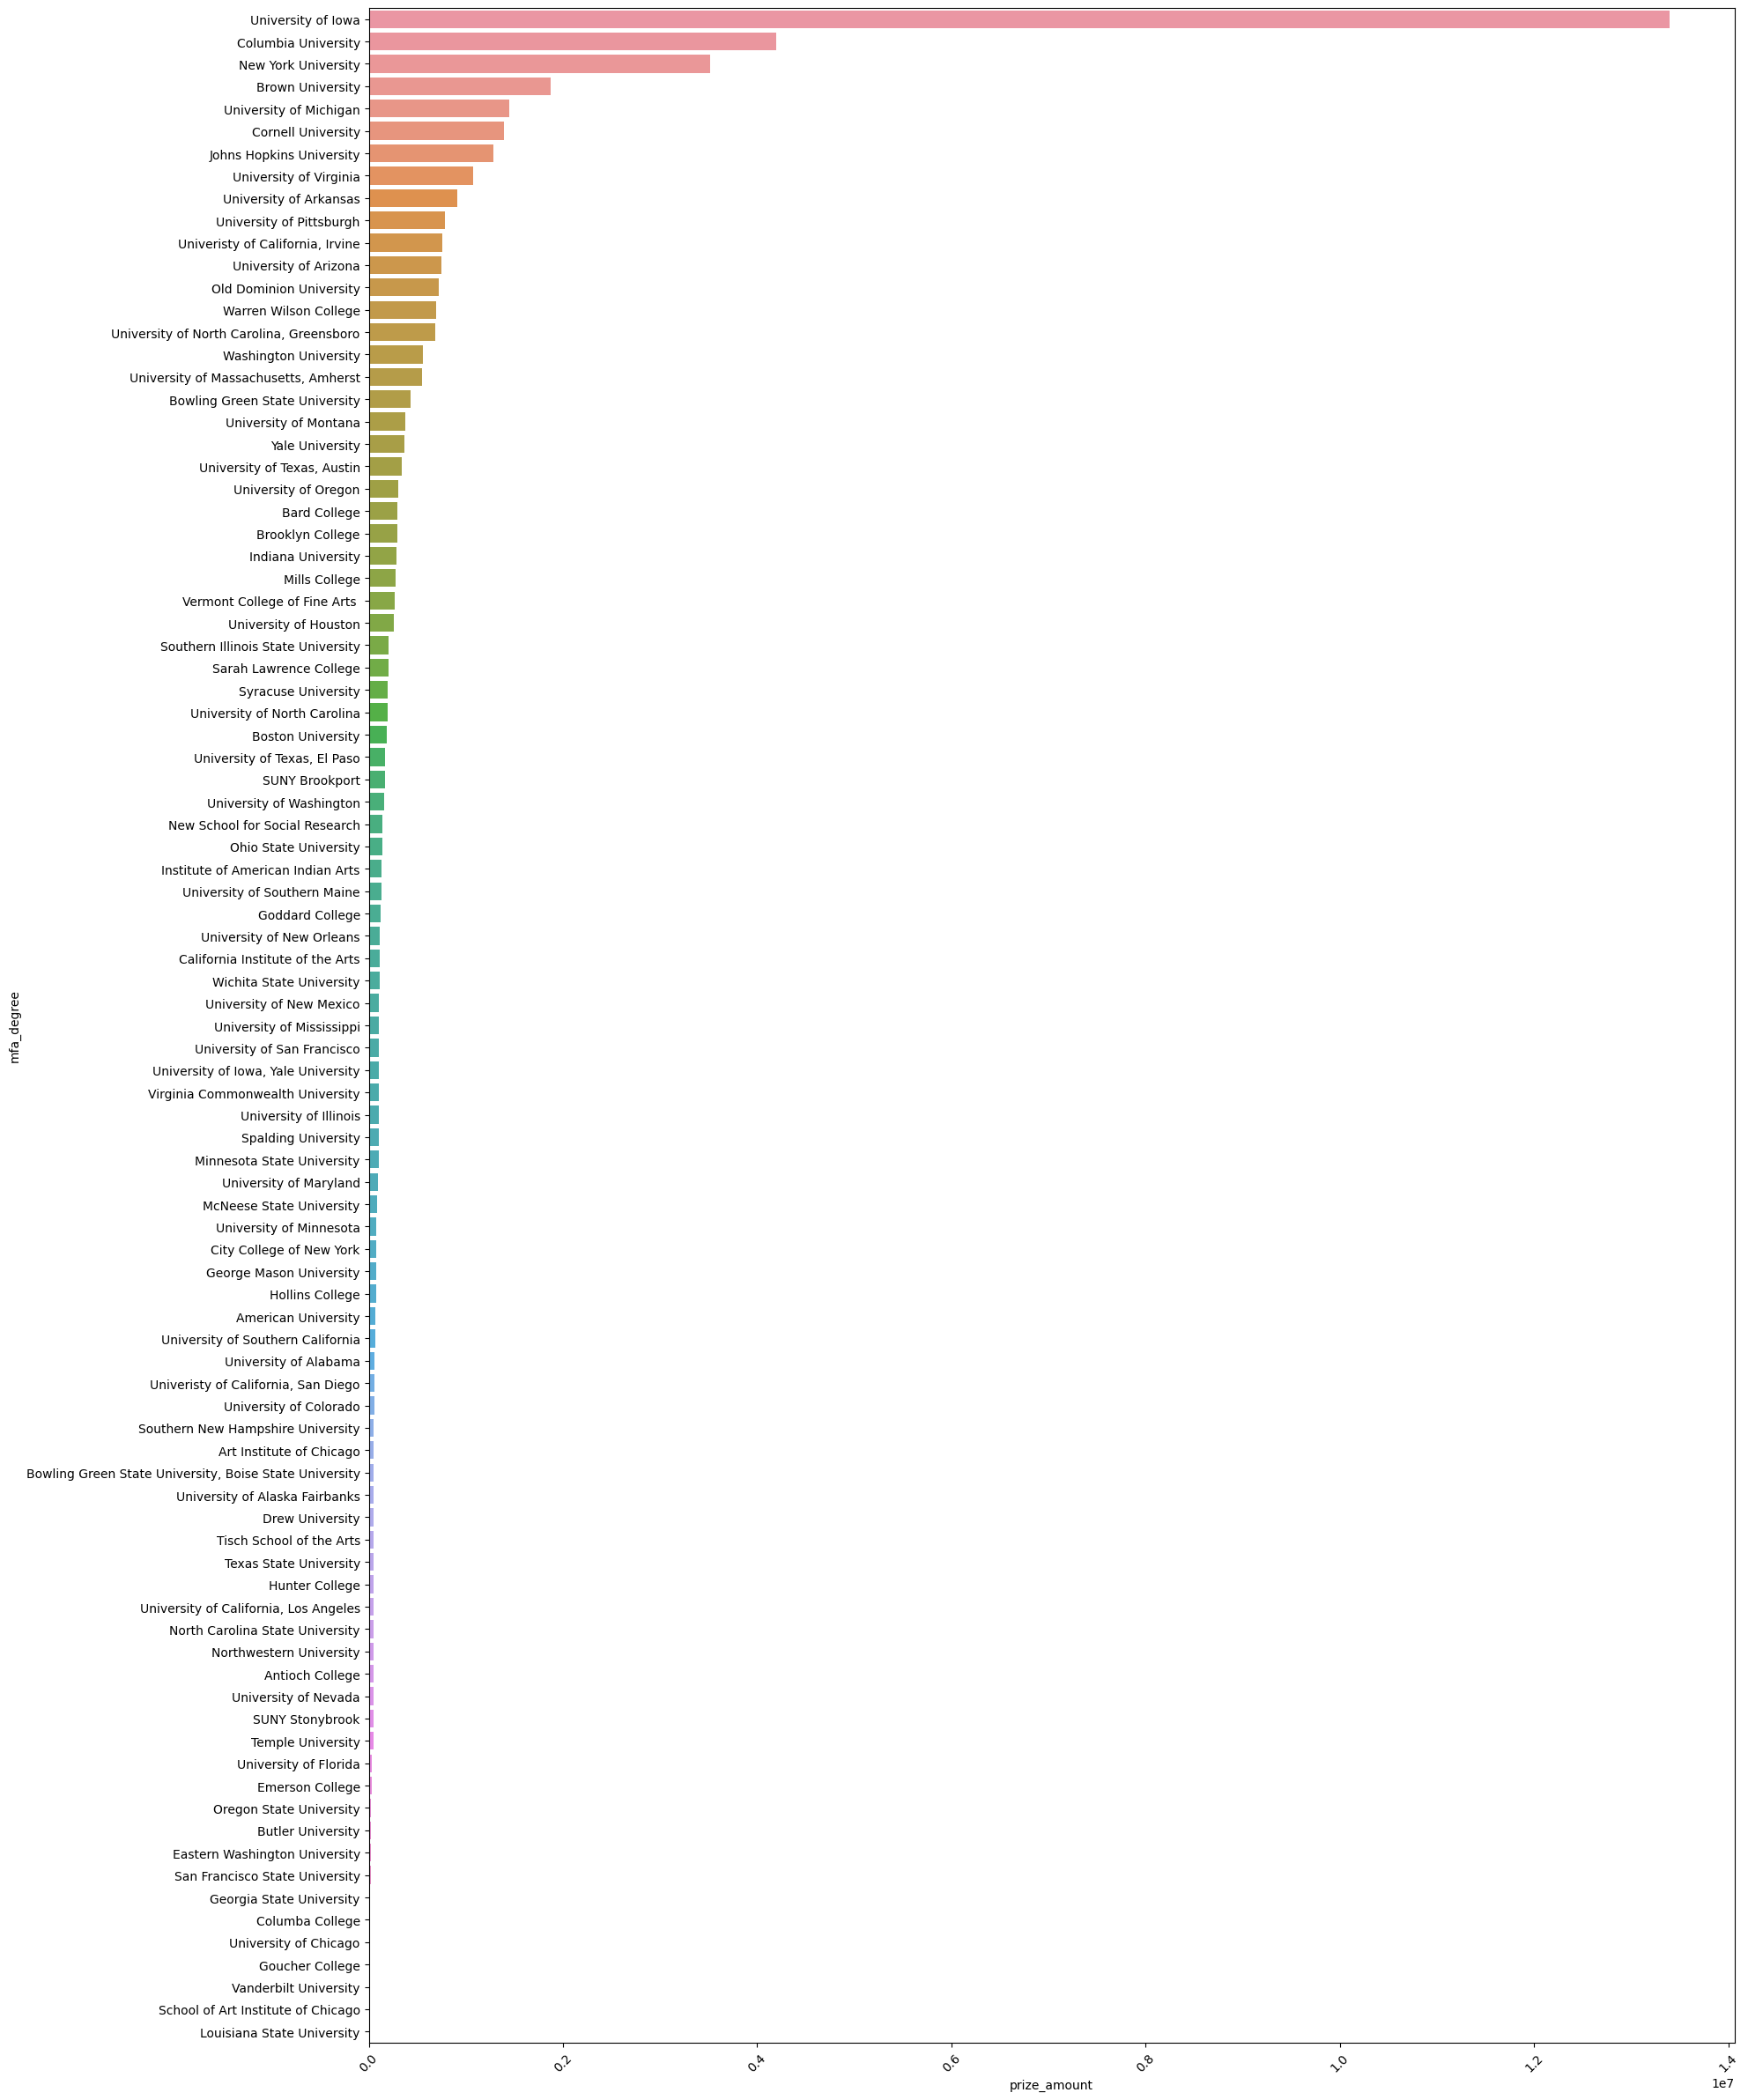

In [89]:
plt.figure(figsize=(20,30))
sns.barplot(mfa, x='prize_amount', y='mfa_degree')
plt.xticks(rotation=45)
plt.show()

What I want to do is find  sums per person per institution and then graph those sums and group by institution. Am I going to have to make a for loop that goes through each person and then group by institution?

In [90]:
df.mfa_degree.value_counts()

University of Iowa                  246
Columbia University                  71
New York University                  49
Univeristy of California, Irvine     23
Brown University                     22
                                   ... 
Texas State University                1
Temple University                     1
North Carolina State University       1
Northwestern University               1
Drew University                       1
Name: mfa_degree, Length: 91, dtype: int64

In [91]:
df.mfa_degree.value_counts().head(60)

University of Iowa                          246
Columbia University                          71
New York University                          49
Univeristy of California, Irvine             23
Brown University                             22
University of Arizona                        21
University of Michigan                       20
Cornell University                           17
Warren Wilson College                        17
Washington University                        16
University of Virginia                       14
University of Texas, Austin                  14
Yale University                              13
University of Massachusetts, Amherst         13
Johns Hopkins University                     12
University of Houston                         9
University of Pittsburgh                      9
University of Arkansas                        9
Brooklyn College                              9
University of Oregon                          9
Indiana University                      

In [92]:
len(df.mfa_degree.value_counts())

91

Let's do some exploration of Graduate Degree or No Graduate degree

In [93]:
df.graduate_degree.value_counts()

graduate    1800
Name: graduate_degree, dtype: int64

In [94]:
grads = df[df['graduate_degree']=='graduate']
nongrads = df[df['graduate_degree']!='graduate']

In [95]:
len(nongrads), len(grads), len(df)

(976, 1800, 2776)

In [96]:
grads.describe()

,Unnamed: 0,person_id,prize_year,prize_amount
count,1800.000000,1800.000000,1800.000000,1800.000000
mean,3587.406111,1226.613333,1997.898889,50858.000000
std,1885.572693,705.995491,18.046441,95788.899665
min,4.000000,2.000000,1924.000000,10000.000000
25%,2193.750000,592.000000,1989.000000,10000.000000
50%,3298.000000,1230.000000,2002.000000,25000.000000
75%,5622.750000,1879.250000,2012.000000,50000.000000
max,6526.000000,2407.000000,2020.000000,625000.000000


In [97]:
nongrads.describe()

,Unnamed: 0,person_id,prize_year,prize_amount
count,976.000000,976.000000,976.000000,976.000000
mean,4163.437500,1199.331967,1983.627049,45876.434426
std,1979.435632,697.581860,23.929903,92276.160868
min,2.000000,1.000000,1918.000000,10000.000000
25%,3792.500000,620.500000,1965.000000,10000.000000
50%,4287.500000,1168.000000,1988.000000,15000.000000
75%,5421.500000,1809.250000,2003.000000,40000.000000
max,7041.000000,2410.000000,2020.000000,625000.000000


I want to make two boxplots side by side of graduate degress vs no graduate degrees

In [98]:
df['graduate_degree'] = df['graduate_degree'].fillna('no degree')

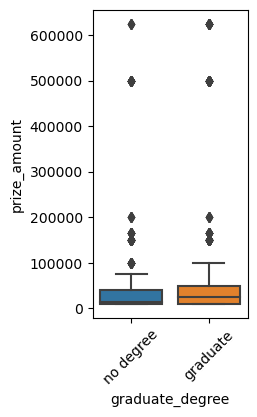

In [99]:
#Box and Whisker plots of prize amounts based on graduate degree or no graduate degree
plt.figure(figsize=(2,4))
sns.boxplot(df, x='graduate_degree', y='prize_amount')
plt.xticks(rotation=45)
plt.show()

In [100]:
gng = df

In [101]:
for i in range(len(gng)):
    if gng['graduate_degree'][i] == 'graduate':
        gng['graduate_degree'][i] = 1
    else:
        gng['graduate_degree'][i] = 0

/var/folders/2s/11ldfx_j2c9237b89l98fmdr0000gn/T/ipykernel_56521/1404000613.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gng['graduate_degree'][i] = 0
/var/folders/2s/11ldfx_j2c9237b89l98fmdr0000gn/T/ipykernel_56521/1404000613.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gng['graduate_degree'][i] = 1


In [102]:
gng.head()

,Unnamed: 0,person_id,full_name,given_name,last_name,gender,elite_institution,graduate_degree,mfa_degree,stegner,role,prize_institution,prize_name,prize_year,prize_genre,prize_type,prize_amount,title_of_winning_book
0,2,1891,Reuben Bercovitch,Reuben,Bercovitch,unknown,NaN,0,NaN,NaN,winner,PEN America,Hemingway Award for Debut Novel,1979,prose,book,10000.0,Hasen
1,3,1807,Pauline Hanson,Pauline,Hanson,unknown,NaN,0,NaN,NaN,winner,American Academy of Arts and Letters,Arts and Letters Awards,1972,no genre,career,10000.0,NaN
2,4,1032,Jean Valentine,Jean,Valentine,female,Radcliffe College,1,NaN,NaN,winner,Yale University,Bollingen Prize for Poetry,2017,poetry,career,10000.0,NaN
3,5,123,Andrea Lawlor,Andrea,Lawlor,nonbinary/they,NaN,1,"University of Massachusetts, Amherst",NaN,winner,Whiting Foundation,Whiting Award,2020,no genre,career,50000.0,NaN
4,6,1295,Kayleb Rae Candrilli,Kayleb Rae,Candrilli,nonbinary/they,NaN,1,University of Alabama,NaN,winner,Whiting Foundation,Whiting Award,2019,no genre,career,50000.0,NaN


In [103]:
bins= gng.prize_amount.unique()

In [104]:
print(bins)

[ 10000.  50000.  15000.  25000. 100000. 150000.  75000.  20000.  25800.
 500000. 625000.  35000.  40000. 165000. 200000.]


In [105]:
gng.groupby('graduate_degree')['prize_amount'].median()

graduate_degree
0    15000.0
1    25000.0
Name: prize_amount, dtype: float64

In [106]:
gng.groupby('graduate_degree')['prize_amount'].mean()

graduate_degree
0    45876.434426
1    50858.000000
Name: prize_amount, dtype: float64

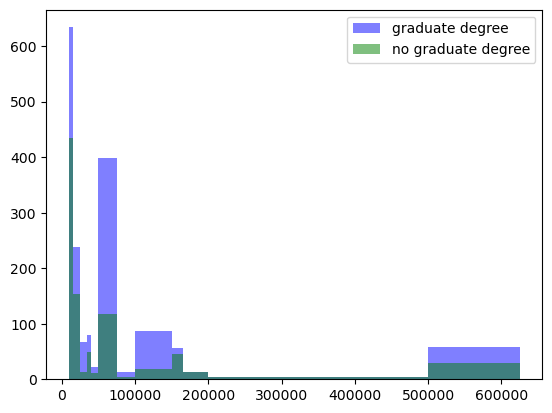

In [107]:
#Create histogram of distributions of awards winnings by gra

b = [10000, 15000, 25000, 25800, 35000, 40000, 50000, 75000, 100000, 150000, 165000, 200000, 500000, 625000]
fig, ax = plt.subplots()
ax.hist(gng[gng['graduate_degree']==1]['prize_amount'], bins=b, alpha=0.5, color='blue', label='graduate degree')
ax.hist(gng[gng['graduate_degree']==0]['prize_amount'], bins=b, alpha=0.5, color='green', label='no graduate degree')
ax.legend()
plt.show()

I want to have an award column so that we can count how many awards people have

In [118]:
df['award'] = 1
df.head()

,Unnamed: 0,person_id,full_name,given_name,last_name,gender,elite_institution,graduate_degree,mfa_degree,stegner,...,prize_name,prize_year,prize_genre,prize_type,prize_amount,title_of_winning_book,elite_1,elite_2,elite_3,award
0,2,1891,Reuben Bercovitch,Reuben,Bercovitch,unknown,NaN,0,NaN,NaN,...,Hemingway Award for Debut Novel,1979,prose,book,10000.0,Hasen,NaN,NaN,NaN,1
1,3,1807,Pauline Hanson,Pauline,Hanson,unknown,NaN,0,NaN,NaN,...,Arts and Letters Awards,1972,no genre,career,10000.0,NaN,NaN,NaN,NaN,1
2,4,1032,Jean Valentine,Jean,Valentine,female,Radcliffe College,1,NaN,NaN,...,Bollingen Prize for Poetry,2017,poetry,career,10000.0,NaN,Radcliffe College,None,None,1
3,5,123,Andrea Lawlor,Andrea,Lawlor,nonbinary/they,NaN,1,"University of Massachusetts, Amherst",NaN,...,Whiting Award,2020,no genre,career,50000.0,NaN,NaN,NaN,NaN,1
4,6,1295,Kayleb Rae Candrilli,Kayleb Rae,Candrilli,nonbinary/they,NaN,1,University of Alabama,NaN,...,Whiting Award,2019,no genre,career,50000.0,NaN,NaN,NaN,NaN,1


Need to fill in NA's 

In [119]:
df['mfa_degree'] = df['mfa_degree'].fillna('no mfa')
df['elite_institution'] = df['elite_institution'].fillna('no elite institution')

In [108]:
#I want to add up the toal amount of Elite colleges since right now it's a string of 
# at most 3 different colleges

#create new DataFrame so as not to mess up the old one
divided = df

In [109]:
#Create three new colums by spliting the elite institution column
divided[['elite_1', 'elite_2', 'elite_3']] = divided['elite_institution'].str.split(',', expand=True)

In [110]:
e1= divided['elite_1'].value_counts()
e1.head()

Harvard University      292
Columbia University     192
Stanford University     143
Yale University         112
Princeton University     77
Name: elite_1, dtype: int64

In [111]:
e2 = divided['elite_2'].value_counts()

In [112]:
e3 = divided['elite_3'].value_counts()

In [113]:
etotal = e1
etotal.head()

Harvard University      292
Columbia University     192
Stanford University     143
Yale University         112
Princeton University     77
Name: elite_1, dtype: int64

In [114]:
e1.loc['Harvard University']

292

In [115]:
test = {}

for index in e2.index:
    for index3 in e3.index:
        if index == index3:
            test[index] = e2.loc[index] + e3.loc[index3]
            
print(test)
print(e2)
print(e3)

{' Columbia University': 55, ' Stanford University': 36, ' Harvard University': 24}
 Columbia University           54
 Stanford University           26
 Harvard University            23
 Princeton University           9
 Brown University               9
 Cornell University             6
 Yale University                5
 University of Chicago          3
 University of Pennsylvania     1
Name: elite_2, dtype: int64
 Stanford University    10
 Harvard University      1
 Columbia University     1
Name: elite_3, dtype: int64


In [141]:
divided.drop(columns=['elite_institution', 'stegner', 'title_of_winning_book'], inplace=True)

In [146]:
divided.set_index('person_id')

,full_name,given_name,last_name,gender,graduate_degree,mfa_degree,role,prize_institution,prize_name,prize_year,prize_genre,prize_type,prize_amount,elite_1,elite_2,elite_3,award
person_id,,,,,,,,,,,,,,,,,
1891,Reuben Bercovitch,Reuben,Bercovitch,unknown,0,no mfa,winner,PEN America,Hemingway Award for Debut Novel,1979,prose,book,10000.0,NaN,NaN,NaN,1
1807,Pauline Hanson,Pauline,Hanson,unknown,0,no mfa,winner,American Academy of Arts and Letters,Arts and Letters Awards,1972,no genre,career,10000.0,NaN,NaN,NaN,1
1032,Jean Valentine,Jean,Valentine,female,1,no mfa,winner,Yale University,Bollingen Prize for Poetry,2017,poetry,career,10000.0,Radcliffe College,None,None,1
123,Andrea Lawlor,Andrea,Lawlor,nonbinary/they,1,"University of Massachusetts, Amherst",winner,Whiting Foundation,Whiting Award,2020,no genre,career,50000.0,NaN,NaN,NaN,1
1295,Kayleb Rae Candrilli,Kayleb Rae,Candrilli,nonbinary/they,1,University of Alabama,winner,Whiting Foundation,Whiting Award,2019,no genre,career,50000.0,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210,Tessa Hadley,Tessa,Hadley,female,0,no mfa,winner,Yale University,Windham Campbell Prize,2016,prose,career,165000.0,NaN,NaN,NaN,1
2247,Timberlake Wertenbaker,Timberlake,Wertenbaker,female,0,no mfa,winner,Whiting Foundation,Whiting Award,1989,no genre,career,50000.0,NaN,NaN,NaN,1
2253,Tina Howe,Tina,Howe,female,0,no mfa,winner,American Academy of Arts and Letters,Arts and Letters Awards,1993,no genre,career,10000.0,NaN,NaN,NaN,1


In [243]:
#Let's create a DF that has one row per author with info about their sum awards,
#sum amount won, gender, elite institution, MFA,

authors = df.groupby(['person_id', 'full_name', 
                     'gender', 'graduate_degree', 'mfa_degree',  
                     ]).agg({'award': 'sum', 'prize_amount': 'sum'}).reset_index()

authors.head(20)

,person_id,full_name,gender,graduate_degree,mfa_degree,award,prize_amount
0,1.0,A. B. Guthrie Jr,male,0,no mfa,1.0,15000.0
1,2.0,A. E. Stallings,female,1,no mfa,3.0,570000.0
2,3.0,A. G. Mojtabai,female,1,no mfa,2.0,20000.0
3,4.0,A. J. Verdelle,female,1,Bard College,2.0,70000.0
4,6.0,A. R. Ammons,male,1,no mfa,9.0,900000.0
5,10.0,Achy Obejas,female,1,Warren Wilson College,1.0,50000.0
6,12.0,Adam Foulds,male,1,no mfa,1.0,10000.0
7,13.0,Adam Haslett,male,1,University of Iowa,1.0,100000.0
8,14.0,Adam Hochschild,male,0,no mfa,2.0,25000.0
9,15.0,Adam Johnson,male,1,McNeese State University,3.0,75000.0


In [199]:
authors.full_name.nunique()

1772

In [200]:
authors.shape

(1781, 7)

In [201]:
n_duplicates = authors.full_name.duplicated()
print(n_duplicates.value_counts())

False    1772
True        9
Name: full_name, dtype: int64


In [202]:
authors[n_duplicates]

,person_id,full_name,gender,graduate_degree,mfa_degree,award,prize_amount
82,121.0,Andre Dubus,male,1,University of Iowa,1.0,500000.0
220,308.0,Campbell McGrath,male,1,Columbia University,2.0,150000.0
463,621.0,Ed Roberson,male,1,no mfa,2.0,125000.0
630,855.0,Hanya Yanagihara,female,1,University of Michigan,1.0,50000.0
634,859.0,Harriet Doerr,female,1,no mfa,1.0,20000.0
685,919.0,Ilya Kaminsky,male,1,no mfa,4.0,135800.0
744,994.0,James Tate,male,1,University of Iowa,3.0,125000.0
775,1033.0,Jean Valentine,female,1,no mfa,4.0,130000.0
1282,1729.0,Nikky Finney,female,1,no mfa,3.0,160000.0


We can use this list in the divided dataframe to update these 16 authors

In [209]:
divided.loc[divided['full_name']=='Adrienne Rich']

,person_id,full_name,given_name,last_name,gender,graduate_degree,mfa_degree,role,prize_institution,prize_name,prize_year,prize_genre,prize_type,prize_amount,elite_1,elite_2,elite_3,award
2011,25.0,Adrienne Rich,Adrienne,Rich,female,1,no mfa,winner,National Book Foundation,National Book Award,1974.0,poetry,book,10000.0,Radcliffe College,None,None,1.0
2047,25.0,Adrienne Rich,Adrienne,Rich,female,1,no mfa,winner,Academy of American Poets,Lenore Marshall Poetry Prize,1992.0,poetry,book,25000.0,Radcliffe College,None,None,1.0
2385,25.0,Adrienne Rich,Adrienne,Rich,female,1,no mfa,winner,Yale University,Bollingen Prize for Poetry,2003.0,poetry,career,10000.0,Radcliffe College,None,None,1.0
2386,25.0,Adrienne Rich,Adrienne,Rich,female,1,no mfa,winner,Lannan Foundation,Lannan Lifetime Achievement Award,1999.0,no genre,career,150000.0,Radcliffe College,None,None,1.0
2387,25.0,Adrienne Rich,Adrienne,Rich,female,1,no mfa,winner,MacArthur Foundation,MacArthur Fellowship,1994.0,no genre,career,500000.0,Radcliffe College,None,None,1.0
2388,25.0,Adrienne Rich,Adrienne,Rich,female,1,no mfa,winner,Poetry Foundation,Ruth Lilly Poetry Prize,1986.0,poetry,career,100000.0,Radcliffe College,None,None,1.0
2389,25.0,Adrienne Rich,Adrienne,Rich,female,1,no mfa,winner,Academy of American Poets,Wallace Stevens Award,1996.0,poetry,career,100000.0,Radcliffe College,None,None,1.0
2565,25.0,Adrienne Rich,Adrienne,Rich,female,1,no mfa,winner,Academy of American Poets,Academy of American Poets Fellowship,1992.0,poetry,career,25000.0,Radcliffe College,None,None,1.0


In [166]:
divided.at['graduate_degree', 2565]=1

In [167]:
divided.loc[divided['full_name']=='Adrienne Rich']
# One down! 

,person_id,full_name,given_name,last_name,gender,graduate_degree,mfa_degree,role,prize_institution,prize_name,prize_year,prize_genre,prize_type,prize_amount,elite_1,elite_2,elite_3,award,2565
2011,25.0,Adrienne Rich,Adrienne,Rich,female,1,no mfa,winner,National Book Foundation,National Book Award,1974.0,poetry,book,10000.0,Radcliffe College,None,None,1.0,NaN
2047,25.0,Adrienne Rich,Adrienne,Rich,female,1,no mfa,winner,Academy of American Poets,Lenore Marshall Poetry Prize,1992.0,poetry,book,25000.0,Radcliffe College,None,None,1.0,NaN
2385,25.0,Adrienne Rich,Adrienne,Rich,female,1,no mfa,winner,Yale University,Bollingen Prize for Poetry,2003.0,poetry,career,10000.0,Radcliffe College,None,None,1.0,NaN
2386,25.0,Adrienne Rich,Adrienne,Rich,female,1,no mfa,winner,Lannan Foundation,Lannan Lifetime Achievement Award,1999.0,no genre,career,150000.0,Radcliffe College,None,None,1.0,NaN
2387,25.0,Adrienne Rich,Adrienne,Rich,female,1,no mfa,winner,MacArthur Foundation,MacArthur Fellowship,1994.0,no genre,career,500000.0,Radcliffe College,None,None,1.0,NaN
2388,25.0,Adrienne Rich,Adrienne,Rich,female,1,no mfa,winner,Poetry Foundation,Ruth Lilly Poetry Prize,1986.0,poetry,career,100000.0,Radcliffe College,None,None,1.0,NaN
2389,25.0,Adrienne Rich,Adrienne,Rich,female,1,no mfa,winner,Academy of American Poets,Wallace Stevens Award,1996.0,poetry,career,100000.0,Radcliffe College,None,None,1.0,NaN
2565,25.0,Adrienne Rich,Adrienne,Rich,female,1,no mfa,winner,Academy of American Poets,Academy of American Poets Fellowship,1992.0,poetry,career,25000.0,Radcliffe College,None,None,1.0,NaN


In [170]:
divided.drop(columns=[2565], inplace=True)

In [171]:
divided.loc[divided['full_name']=='Akhil Sharma']

,person_id,full_name,given_name,last_name,gender,graduate_degree,mfa_degree,role,prize_institution,prize_name,prize_year,prize_genre,prize_type,prize_amount,elite_1,elite_2,elite_3,award
428,32.0,Akhil Sharma,Akhil,Sharma,male,1,no mfa,winner,PEN America,Hemingway Award for Debut Novel,2001.0,prose,book,10000.0,Princeton University,Stanford University,Harvard University,1.0
924,32.0,Akhil Sharma,Akhil,Sharma,male,1,no mfa,winner,Whiting Foundation,Whiting Award,2001.0,no genre,career,50000.0,Princeton University,Stanford University,None,1.0


This one is interesting because there are three elite universities listed for the first row, but only two in the second. I'll need to do some research about Harvard.

Looks like he went to Harvard Law School! https://en.wikipedia.org/wiki/Akhil_Sharma

Let's add that to elite_3

In [193]:
divided.loc[[428,924], 'elite_3'] = 'Harvard University'

In [194]:
divided.loc[divided['full_name']=='Akhil Sharma']

#Two down! 

,person_id,full_name,given_name,last_name,gender,graduate_degree,mfa_degree,role,prize_institution,prize_name,prize_year,prize_genre,prize_type,prize_amount,elite_1,elite_2,elite_3,award
428,32.0,Akhil Sharma,Akhil,Sharma,male,1,no mfa,winner,PEN America,Hemingway Award for Debut Novel,2001.0,prose,book,10000.0,Princeton University,Stanford University,Harvard University,1.0
924,32.0,Akhil Sharma,Akhil,Sharma,male,1,no mfa,winner,Whiting Foundation,Whiting Award,2001.0,no genre,career,50000.0,Princeton University,Stanford University,Harvard University,1.0


In [203]:
divided.loc[divided['full_name']=='Andre Dubus']

,person_id,full_name,given_name,last_name,gender,graduate_degree,mfa_degree,role,prize_institution,prize_name,prize_year,prize_genre,prize_type,prize_amount,elite_1,elite_2,elite_3,award
620,121.0,Andre Dubus,Andre,Dubus,male,1,University of Iowa,winner,MacArthur Foundation,MacArthur Fellowship,1988.0,no genre,career,500000.0,NaN,NaN,NaN,1.0
1503,121.0,Andre Dubus,Andre,Dubus,male,0,no mfa,winner,American Academy of Arts and Letters,Arts and Letters Awards,2012.0,no genre,career,10000.0,NaN,NaN,NaN,1.0


In [204]:
divided.loc[1503, 'graduate_degree'] = 1
divided.loc[1503, 'mfa_degree'] = 'University of Iowa'


In [205]:
divided.loc[divided['full_name']=='Andre Dubus']

,person_id,full_name,given_name,last_name,gender,graduate_degree,mfa_degree,role,prize_institution,prize_name,prize_year,prize_genre,prize_type,prize_amount,elite_1,elite_2,elite_3,award
620,121.0,Andre Dubus,Andre,Dubus,male,1,University of Iowa,winner,MacArthur Foundation,MacArthur Fellowship,1988.0,no genre,career,500000.0,NaN,NaN,NaN,1.0
1503,121.0,Andre Dubus,Andre,Dubus,male,1,University of Iowa,winner,American Academy of Arts and Letters,Arts and Letters Awards,2012.0,no genre,career,10000.0,NaN,NaN,NaN,1.0


In [175]:
divided.loc[divided['full_name']=='Benjamine Alire Saenz']

,person_id,full_name,given_name,last_name,gender,graduate_degree,mfa_degree,role,prize_institution,prize_name,prize_year,prize_genre,prize_type,prize_amount,elite_1,elite_2,elite_3,award
351,230.0,Benjamine Alire Saenz,Benjamine Alire,Saenz,male,1,"University of Texas, El Paso",winner,PEN America,Faulkner Award for Fiction,2013.0,prose,book,15000.0,NaN,NaN,NaN,1.0
537,230.0,Benjamine Alire Saenz,Benjamine Alire,Saenz,male,1,"University of Texas, El Paso",winner,Lannan Foundation,Lannan Award,1993.0,poetry,career,150000.0,Stanford University,None,None,1.0


Mr. Saenz didn't receive a degree from Standford, but he was awarded a Stegner Fellowship which I'd say puts him in connection with Stanford.

In [176]:
divided.loc[351, 'elite_1'] = 'Stanford University'

In [177]:
divided.loc[divided['full_name']=='Benjamine Alire Saenz']

#Another one done!

,person_id,full_name,given_name,last_name,gender,graduate_degree,mfa_degree,role,prize_institution,prize_name,prize_year,prize_genre,prize_type,prize_amount,elite_1,elite_2,elite_3,award
351,230.0,Benjamine Alire Saenz,Benjamine Alire,Saenz,male,1,"University of Texas, El Paso",winner,PEN America,Faulkner Award for Fiction,2013.0,prose,book,15000.0,Stanford University,NaN,NaN,1.0
537,230.0,Benjamine Alire Saenz,Benjamine Alire,Saenz,male,1,"University of Texas, El Paso",winner,Lannan Foundation,Lannan Award,1993.0,poetry,career,150000.0,Stanford University,None,None,1.0


In [178]:
divided.loc[divided['full_name']=='C. E. Morgan']

,person_id,full_name,given_name,last_name,gender,graduate_degree,mfa_degree,role,prize_institution,prize_name,prize_year,prize_genre,prize_type,prize_amount,elite_1,elite_2,elite_3,award
1843,301.0,C. E. Morgan,C. E.,Morgan,female,1,no mfa,winner,Kirkus Review,Kirkus Prize,2016.0,prose,book,50000.0,Harvard University,None,None,1.0
2460,301.0,C. E. Morgan,C. E.,Morgan,female,1,no mfa,winner,Yale University,Windham Campbell Prize,2016.0,prose,career,165000.0,NaN,NaN,NaN,1.0
2620,301.0,C. E. Morgan,C. E.,Morgan,female,0,no mfa,winner,Lannan Foundation,Lannan Fellowship,2010.0,prose,career,50000.0,NaN,NaN,NaN,1.0
2621,301.0,C. E. Morgan,C. E.,Morgan,female,0,no mfa,winner,"United States Artists (Ford, Rockefeller, Rasm...",USA Fellowship,2012.0,no genre,career,50000.0,NaN,NaN,NaN,1.0
2622,301.0,C. E. Morgan,C. E.,Morgan,female,0,no mfa,winner,Whiting Foundation,Whiting Award,2013.0,no genre,career,50000.0,NaN,NaN,NaN,1.0


Going to try something here and it might not work...

In [179]:
divided.loc[[2460, 2620, 2621, 2622], 'elite_1'] = 'Harvard University'

In [181]:
divided.loc[[2620, 2621, 2622], 'graduate_degree'] = 1

It worked! 

In [182]:
divided.loc[divided['full_name']=='C. E. Morgan']

,person_id,full_name,given_name,last_name,gender,graduate_degree,mfa_degree,role,prize_institution,prize_name,prize_year,prize_genre,prize_type,prize_amount,elite_1,elite_2,elite_3,award
1843,301.0,C. E. Morgan,C. E.,Morgan,female,1,no mfa,winner,Kirkus Review,Kirkus Prize,2016.0,prose,book,50000.0,Harvard University,None,None,1.0
2460,301.0,C. E. Morgan,C. E.,Morgan,female,1,no mfa,winner,Yale University,Windham Campbell Prize,2016.0,prose,career,165000.0,Harvard University,NaN,NaN,1.0
2620,301.0,C. E. Morgan,C. E.,Morgan,female,1,no mfa,winner,Lannan Foundation,Lannan Fellowship,2010.0,prose,career,50000.0,Harvard University,NaN,NaN,1.0
2621,301.0,C. E. Morgan,C. E.,Morgan,female,1,no mfa,winner,"United States Artists (Ford, Rockefeller, Rasm...",USA Fellowship,2012.0,no genre,career,50000.0,Harvard University,NaN,NaN,1.0
2622,301.0,C. E. Morgan,C. E.,Morgan,female,1,no mfa,winner,Whiting Foundation,Whiting Award,2013.0,no genre,career,50000.0,Harvard University,NaN,NaN,1.0


In [206]:
divided.loc[divided['full_name']=='Campbell McGrath']

,person_id,full_name,given_name,last_name,gender,graduate_degree,mfa_degree,role,prize_institution,prize_name,prize_year,prize_genre,prize_type,prize_amount,elite_1,elite_2,elite_3,award
192,308.0,Campbell McGrath,Campbell,McGrath,male,1,Columbia University,winner,Claremont Graduate University,Kingsley Tufts Poetry Award,1997.0,poetry,book,100000.0,University of Chicago,Columbia University,None,1.0
776,308.0,Campbell McGrath,Campbell,McGrath,male,1,Columbia University,winner,"United States Artists (Ford, Rockefeller, Rasm...",USA Fellowship,2011.0,no genre,career,50000.0,University of Chicago,Columbia University,None,1.0
1527,308.0,Campbell McGrath,Campbell,McGrath,male,0,no mfa,winner,MacArthur Foundation,MacArthur Fellowship,1999.0,no genre,career,625000.0,NaN,NaN,NaN,1.0


In [207]:
divided.loc[1527, ['graduate_degree', 'mfa_degree', 'elite_1', 'elite_2']] = [1, 'Columbia University', 'University of Chicago', 'Columbia University']

In [208]:
divided.loc[divided['full_name']=='Campbell McGrath']

,person_id,full_name,given_name,last_name,gender,graduate_degree,mfa_degree,role,prize_institution,prize_name,prize_year,prize_genre,prize_type,prize_amount,elite_1,elite_2,elite_3,award
192,308.0,Campbell McGrath,Campbell,McGrath,male,1,Columbia University,winner,Claremont Graduate University,Kingsley Tufts Poetry Award,1997.0,poetry,book,100000.0,University of Chicago,Columbia University,None,1.0
776,308.0,Campbell McGrath,Campbell,McGrath,male,1,Columbia University,winner,"United States Artists (Ford, Rockefeller, Rasm...",USA Fellowship,2011.0,no genre,career,50000.0,University of Chicago,Columbia University,None,1.0
1527,308.0,Campbell McGrath,Campbell,McGrath,male,1,Columbia University,winner,MacArthur Foundation,MacArthur Fellowship,1999.0,no genre,career,625000.0,University of Chicago,Columbia University,NaN,1.0


In [210]:
divided.loc[divided['full_name']=='Ed Roberson']

,person_id,full_name,given_name,last_name,gender,graduate_degree,mfa_degree,role,prize_institution,prize_name,prize_year,prize_genre,prize_type,prize_amount,elite_1,elite_2,elite_3,award
1204,621.0,Ed Roberson,Ed,Roberson,male,1,no mfa,winner,Academy of American Poets,Academy of American Poets Fellowship,2017.0,poetry,career,25000.0,NaN,NaN,NaN,1.0
1205,621.0,Ed Roberson,Ed,Roberson,male,1,no mfa,winner,Poetry Foundation,Ruth Lilly Poetry Prize,2016.0,poetry,career,100000.0,NaN,NaN,NaN,1.0
1573,621.0,Ed Roberson,Ed,Roberson,male,0,no mfa,winner,Poets & Writers,Jackson Poetry Prize,2020.0,poetry,career,75000.0,NaN,NaN,NaN,1.0


In [211]:
divided.loc[1573, 'graduate_degree'] = 1

In [212]:
divided.loc[divided['full_name']=='Ed Roberson']

,person_id,full_name,given_name,last_name,gender,graduate_degree,mfa_degree,role,prize_institution,prize_name,prize_year,prize_genre,prize_type,prize_amount,elite_1,elite_2,elite_3,award
1204,621.0,Ed Roberson,Ed,Roberson,male,1,no mfa,winner,Academy of American Poets,Academy of American Poets Fellowship,2017.0,poetry,career,25000.0,NaN,NaN,NaN,1.0
1205,621.0,Ed Roberson,Ed,Roberson,male,1,no mfa,winner,Poetry Foundation,Ruth Lilly Poetry Prize,2016.0,poetry,career,100000.0,NaN,NaN,NaN,1.0
1573,621.0,Ed Roberson,Ed,Roberson,male,1,no mfa,winner,Poets & Writers,Jackson Poetry Prize,2020.0,poetry,career,75000.0,NaN,NaN,NaN,1.0


In [213]:
divided.loc[divided['full_name']=='Hanya Yanagihara']

,person_id,full_name,given_name,last_name,gender,graduate_degree,mfa_degree,role,prize_institution,prize_name,prize_year,prize_genre,prize_type,prize_amount,elite_1,elite_2,elite_3,award
2061,855.0,Hanya Yanagihara,Hanya,Yanagihara,female,0,no mfa,winner,Kirkus Review,Kirkus Prize,2015.0,prose,book,50000.0,NaN,NaN,NaN,1.0
2127,855.0,Hanya Yanagihara,Hanya,Yanagihara,female,1,University of Michigan,winner,Whiting Foundation,Whiting Award,2012.0,no genre,career,50000.0,NaN,NaN,NaN,1.0
2669,855.0,Hanya Yanagihara,Hanya,Yanagihara,female,0,no mfa,winner,American Academy of Arts and Letters,Benjamin H. Danks Award,2020.0,no genre,career,20000.0,NaN,NaN,NaN,1.0


In [214]:
divided.loc[[2061, 2669], ['graduate_degree', 'mfa_degree']] = [1, 'University of Michigan']

In [215]:
divided.loc[divided['full_name']=='Hanya Yanagihara']

,person_id,full_name,given_name,last_name,gender,graduate_degree,mfa_degree,role,prize_institution,prize_name,prize_year,prize_genre,prize_type,prize_amount,elite_1,elite_2,elite_3,award
2061,855.0,Hanya Yanagihara,Hanya,Yanagihara,female,1,University of Michigan,winner,Kirkus Review,Kirkus Prize,2015.0,prose,book,50000.0,NaN,NaN,NaN,1.0
2127,855.0,Hanya Yanagihara,Hanya,Yanagihara,female,1,University of Michigan,winner,Whiting Foundation,Whiting Award,2012.0,no genre,career,50000.0,NaN,NaN,NaN,1.0
2669,855.0,Hanya Yanagihara,Hanya,Yanagihara,female,1,University of Michigan,winner,American Academy of Arts and Letters,Benjamin H. Danks Award,2020.0,no genre,career,20000.0,NaN,NaN,NaN,1.0


In [216]:
divided.loc[divided['full_name']=='Harriet Doerr']

,person_id,full_name,given_name,last_name,gender,graduate_degree,mfa_degree,role,prize_institution,prize_name,prize_year,prize_genre,prize_type,prize_amount,elite_1,elite_2,elite_3,award
1898,859.0,Harriet Doerr,Harriet,Doerr,female,0,no mfa,winner,National Book Foundation,National Book Award,1984.0,prose,book,10000.0,NaN,NaN,NaN,1.0
2378,859.0,Harriet Doerr,Harriet,Doerr,female,1,no mfa,winner,American Academy of Arts and Letters,Harold D. Vursell Memorial Award,1985.0,prose,career,20000.0,Stanford University,None,None,1.0


In [217]:
divided.loc[1898, ['graduate_degree', 'elite_1']] = [1, 'Stanford University']
divided.loc[divided['full_name']=='Harriet Doerr']

,person_id,full_name,given_name,last_name,gender,graduate_degree,mfa_degree,role,prize_institution,prize_name,prize_year,prize_genre,prize_type,prize_amount,elite_1,elite_2,elite_3,award
1898,859.0,Harriet Doerr,Harriet,Doerr,female,1,no mfa,winner,National Book Foundation,National Book Award,1984.0,prose,book,10000.0,Stanford University,NaN,NaN,1.0
2378,859.0,Harriet Doerr,Harriet,Doerr,female,1,no mfa,winner,American Academy of Arts and Letters,Harold D. Vursell Memorial Award,1985.0,prose,career,20000.0,Stanford University,None,None,1.0


In [219]:
divided.loc[divided['full_name']=='Ilya Kaminsky']

,person_id,full_name,given_name,last_name,gender,graduate_degree,mfa_degree,role,prize_institution,prize_name,prize_year,prize_genre,prize_type,prize_amount,elite_1,elite_2,elite_3,award
1227,919.0,Ilya Kaminsky,Ilya,Kaminsky,male,1,no mfa,winner,Lannan Foundation,Lannan Fellowship,2008.0,poetry,career,50000.0,NaN,NaN,NaN,1.0
1228,919.0,Ilya Kaminsky,Ilya,Kaminsky,male,1,no mfa,winner,American Academy of Arts and Letters,Metcalf Awards,2005.0,no genre,career,10000.0,NaN,NaN,NaN,1.0
1229,919.0,Ilya Kaminsky,Ilya,Kaminsky,male,1,no mfa,winner,Poetry Foundation,Ruth Lilly And Dorothy Sargent Rosenberg Poetr...,2001.0,poetry,career,25800.0,NaN,NaN,NaN,1.0
1230,919.0,Ilya Kaminsky,Ilya,Kaminsky,male,1,no mfa,winner,Whiting Foundation,Whiting Award,2005.0,no genre,career,50000.0,NaN,NaN,NaN,1.0
1622,919.0,Ilya Kaminsky,Ilya,Kaminsky,male,0,no mfa,winner,Academy of American Poets,Academy of American Poets Fellowship,2019.0,poetry,career,25000.0,NaN,NaN,NaN,1.0


In [220]:
divided.loc[1622, 'graduate_degree'] = 1
divided.loc[divided['full_name']=='Ilya Kaminsky']

,person_id,full_name,given_name,last_name,gender,graduate_degree,mfa_degree,role,prize_institution,prize_name,prize_year,prize_genre,prize_type,prize_amount,elite_1,elite_2,elite_3,award
1227,919.0,Ilya Kaminsky,Ilya,Kaminsky,male,1,no mfa,winner,Lannan Foundation,Lannan Fellowship,2008.0,poetry,career,50000.0,NaN,NaN,NaN,1.0
1228,919.0,Ilya Kaminsky,Ilya,Kaminsky,male,1,no mfa,winner,American Academy of Arts and Letters,Metcalf Awards,2005.0,no genre,career,10000.0,NaN,NaN,NaN,1.0
1229,919.0,Ilya Kaminsky,Ilya,Kaminsky,male,1,no mfa,winner,Poetry Foundation,Ruth Lilly And Dorothy Sargent Rosenberg Poetr...,2001.0,poetry,career,25800.0,NaN,NaN,NaN,1.0
1230,919.0,Ilya Kaminsky,Ilya,Kaminsky,male,1,no mfa,winner,Whiting Foundation,Whiting Award,2005.0,no genre,career,50000.0,NaN,NaN,NaN,1.0
1622,919.0,Ilya Kaminsky,Ilya,Kaminsky,male,1,no mfa,winner,Academy of American Poets,Academy of American Poets Fellowship,2019.0,poetry,career,25000.0,NaN,NaN,NaN,1.0


In [221]:
divided.loc[divided['full_name']=='James Tate']

,person_id,full_name,given_name,last_name,gender,graduate_degree,mfa_degree,role,prize_institution,prize_name,prize_year,prize_genre,prize_type,prize_amount,elite_1,elite_2,elite_3,award
50,994.0,James Tate,James,Tate,male,1,University of Iowa,winner,National Book Foundation,National Book Award,1994.0,poetry,book,10000.0,NaN,NaN,NaN,1.0
210,994.0,James Tate,James,Tate,male,1,University of Iowa,winner,Columbia University,Pulitzer Prize,1992.0,poetry,book,15000.0,NaN,NaN,NaN,1.0
649,994.0,James Tate,James,Tate,male,1,University of Iowa,winner,Academy of American Poets,Wallace Stevens Award,1995.0,poetry,career,100000.0,NaN,NaN,NaN,1.0
679,994.0,James Tate,James,Tate,male,0,University of Iowa,winner,American Academy of Arts and Letters,Arts and Letters Awards,1974.0,no genre,career,10000.0,NaN,NaN,NaN,1.0


In [235]:
divided.loc[679, 'graduate_degree'] = 1
divided.loc[divided['full_name']=='James Tate']

,person_id,full_name,given_name,last_name,gender,graduate_degree,mfa_degree,role,prize_institution,prize_name,prize_year,prize_genre,prize_type,prize_amount,elite_1,elite_2,elite_3,award
50,994.0,James Tate,James,Tate,male,1,University of Iowa,winner,National Book Foundation,National Book Award,1994.0,poetry,book,10000.0,NaN,NaN,NaN,1.0
210,994.0,James Tate,James,Tate,male,1,University of Iowa,winner,Columbia University,Pulitzer Prize,1992.0,poetry,book,15000.0,NaN,NaN,NaN,1.0
649,994.0,James Tate,James,Tate,male,1,University of Iowa,winner,Academy of American Poets,Wallace Stevens Award,1995.0,poetry,career,100000.0,NaN,NaN,NaN,1.0
679,994.0,James Tate,James,Tate,male,1,University of Iowa,winner,American Academy of Arts and Letters,Arts and Letters Awards,1974.0,no genre,career,10000.0,NaN,NaN,NaN,1.0


In [237]:
divided.loc[divided['full_name']=='Jean Valentine']

,person_id,full_name,given_name,last_name,gender,graduate_degree,mfa_degree,role,prize_institution,prize_name,prize_year,prize_genre,prize_type,prize_amount,elite_1,elite_2,elite_3,award
2,1032.0,Jean Valentine,Jean,Valentine,female,1,no mfa,winner,Yale University,Bollingen Prize for Poetry,2017.0,poetry,career,10000.0,Radcliffe College,None,None,1.0
2008,1033.0,Jean Valentine,Jean,Valentine,female,1,no mfa,winner,National Book Foundation,National Book Award,2004.0,poetry,book,10000.0,Radcliffe College,None,None,1.0
2390,1033.0,Jean Valentine,Jean,Valentine,female,1,no mfa,winner,American Academy of Arts and Letters,Arts and Letters Awards,2014.0,no genre,career,10000.0,Radcliffe College,None,None,1.0
2391,1033.0,Jean Valentine,Jean,Valentine,female,1,no mfa,winner,American Academy of Arts and Letters,Morton Dauwen Zabel Award,2006.0,poetry,career,10000.0,Radcliffe College,None,None,1.0
2392,1033.0,Jean Valentine,Jean,Valentine,female,1,no mfa,winner,Academy of American Poets,Wallace Stevens Award,2009.0,poetry,career,100000.0,Radcliffe College,None,None,1.0


In [238]:
divided.loc[2, 'person_id'] = 1033
divided.loc[divided['full_name']=='Jean Valentine']

,person_id,full_name,given_name,last_name,gender,graduate_degree,mfa_degree,role,prize_institution,prize_name,prize_year,prize_genre,prize_type,prize_amount,elite_1,elite_2,elite_3,award
2,1033.0,Jean Valentine,Jean,Valentine,female,1,no mfa,winner,Yale University,Bollingen Prize for Poetry,2017.0,poetry,career,10000.0,Radcliffe College,None,None,1.0
2008,1033.0,Jean Valentine,Jean,Valentine,female,1,no mfa,winner,National Book Foundation,National Book Award,2004.0,poetry,book,10000.0,Radcliffe College,None,None,1.0
2390,1033.0,Jean Valentine,Jean,Valentine,female,1,no mfa,winner,American Academy of Arts and Letters,Arts and Letters Awards,2014.0,no genre,career,10000.0,Radcliffe College,None,None,1.0
2391,1033.0,Jean Valentine,Jean,Valentine,female,1,no mfa,winner,American Academy of Arts and Letters,Morton Dauwen Zabel Award,2006.0,poetry,career,10000.0,Radcliffe College,None,None,1.0
2392,1033.0,Jean Valentine,Jean,Valentine,female,1,no mfa,winner,Academy of American Poets,Wallace Stevens Award,2009.0,poetry,career,100000.0,Radcliffe College,None,None,1.0


In [239]:
divided.loc[divided['full_name']=='Nikky Finney']

,person_id,full_name,given_name,last_name,gender,graduate_degree,mfa_degree,role,prize_institution,prize_name,prize_year,prize_genre,prize_type,prize_amount,elite_1,elite_2,elite_3,award
1982,1729.0,Nikky Finney,Nikky,Finney,female,1,no mfa,winner,National Book Foundation,National Book Award,2011.0,poetry,book,10000.0,NaN,NaN,NaN,1.0
2542,1729.0,Nikky Finney,Nikky,Finney,female,1,no mfa,winner,Ford Foundation,Art of Change,2017.0,no genre,career,50000.0,NaN,NaN,NaN,1.0
2543,1729.0,Nikky Finney,Nikky,Finney,female,1,no mfa,winner,Academy of American Poets,Wallace Stevens Award,2020.0,poetry,career,100000.0,NaN,NaN,NaN,1.0
2751,1729.0,Nikky Finney,Nikky,Finney,female,0,no mfa,winner,Academy of American Poets,Academy of American Poets Fellowship,2020.0,poetry,career,25000.0,NaN,NaN,NaN,1.0


In [240]:
divided.loc[2751, 'graduate_degree'] = 1
divided.loc[divided['full_name']=='Nikky Finney']

,person_id,full_name,given_name,last_name,gender,graduate_degree,mfa_degree,role,prize_institution,prize_name,prize_year,prize_genre,prize_type,prize_amount,elite_1,elite_2,elite_3,award
1982,1729.0,Nikky Finney,Nikky,Finney,female,1,no mfa,winner,National Book Foundation,National Book Award,2011.0,poetry,book,10000.0,NaN,NaN,NaN,1.0
2542,1729.0,Nikky Finney,Nikky,Finney,female,1,no mfa,winner,Ford Foundation,Art of Change,2017.0,no genre,career,50000.0,NaN,NaN,NaN,1.0
2543,1729.0,Nikky Finney,Nikky,Finney,female,1,no mfa,winner,Academy of American Poets,Wallace Stevens Award,2020.0,poetry,career,100000.0,NaN,NaN,NaN,1.0
2751,1729.0,Nikky Finney,Nikky,Finney,female,1,no mfa,winner,Academy of American Poets,Academy of American Poets Fellowship,2020.0,poetry,career,25000.0,NaN,NaN,NaN,1.0


Sanity Check for dupelicates! 

In [245]:
authors1 = divided.groupby(['person_id', 'full_name', 
                     'gender', 'graduate_degree', 'mfa_degree',  
                     ]).agg({'award': 'sum', 'prize_amount': 'sum'}).reset_index()

n_duplicates1 = authors1.full_name.duplicated()
authors1[n_duplicates1]

,person_id,full_name,gender,graduate_degree,mfa_degree,award,prize_amount


In [262]:
divided.loc[divided['gender']=='unknown']

,person_id,full_name,given_name,last_name,gender,graduate_degree,mfa_degree,role,prize_institution,prize_name,prize_year,prize_genre,prize_type,prize_amount,elite_1,elite_2,elite_3,award
0,1891.0,Reuben Bercovitch,Reuben,Bercovitch,unknown,0,no mfa,winner,PEN America,Hemingway Award for Debut Novel,1979.0,prose,book,10000.0,NaN,NaN,NaN,1.0
1,1807.0,Pauline Hanson,Pauline,Hanson,unknown,0,no mfa,winner,American Academy of Arts and Letters,Arts and Letters Awards,1972.0,no genre,career,10000.0,NaN,NaN,NaN,1.0


In [263]:
divided.loc[0, 'gender'] = 'male'
divided.loc[1, 'gender'] = 'female'

I found Pauline Hanson's book of poems, and then found her contribution in an old copy of POETRY and looked in the contributors section for a pronoun! Reuben was easier to find.

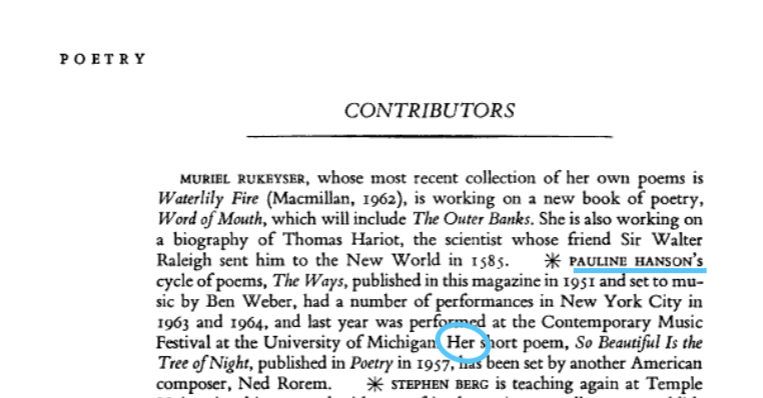

In [265]:
from IPython.display import Image
Image(filename='Pauline Hanson.png')


In [247]:
authors1.gender.value_counts()

male              1112
female             656
nonbinary/they       2
unknown              2
Name: gender, dtype: int64

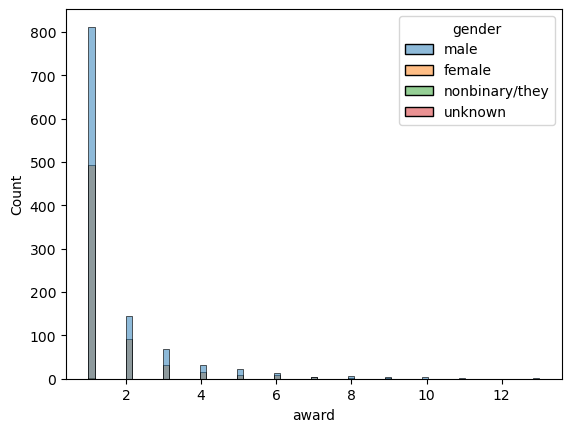

In [248]:
sns.histplot(data=authors1, x='award', hue='gender')
plt.show()

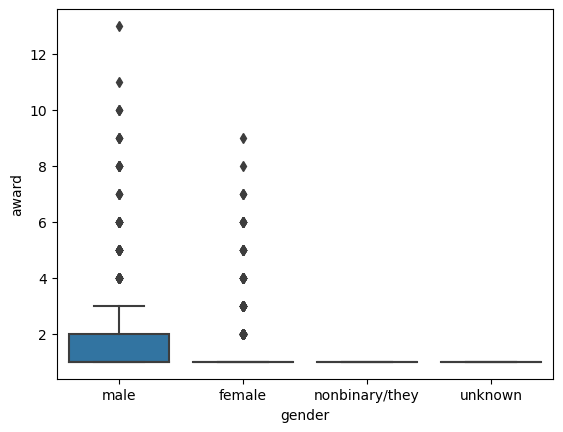

In [249]:
sns.boxplot(data=authors1, x='gender', y='award')
plt.show()

/var/folders/2s/11ldfx_j2c9237b89l98fmdr0000gn/T/ipykernel_56521/2295398701.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=authors2.corr()


<Axes: >

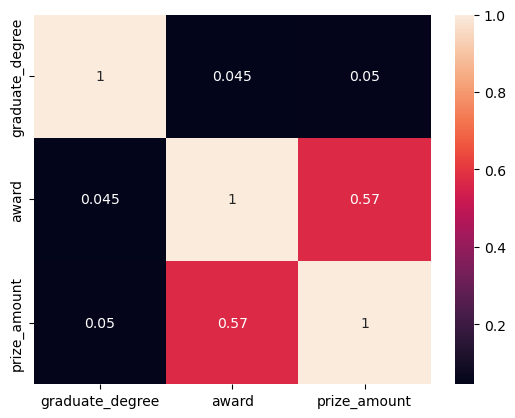

In [255]:
authors2=authors1.drop(columns=['person_id'])

correlation=authors2.corr()
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)

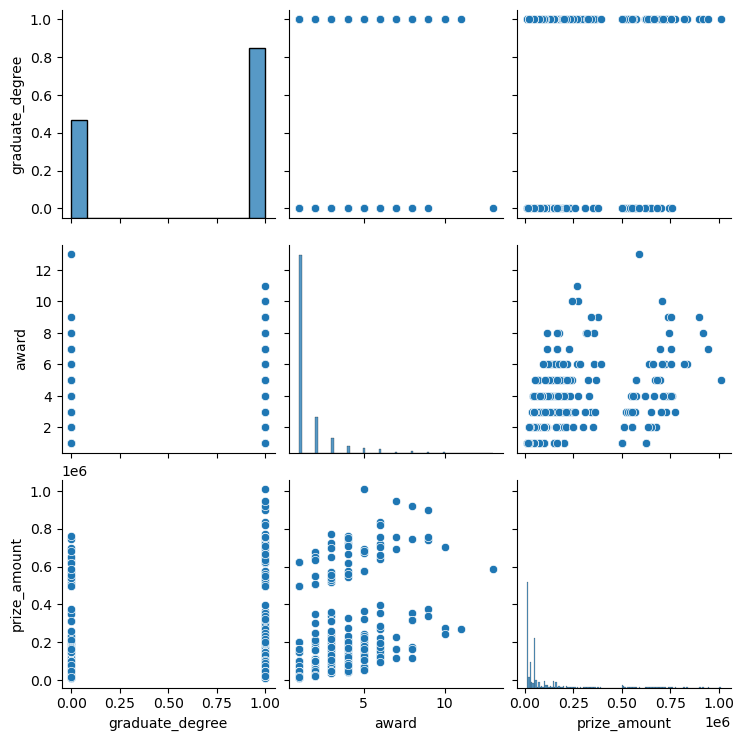

In [256]:
sns.pairplot(authors2)

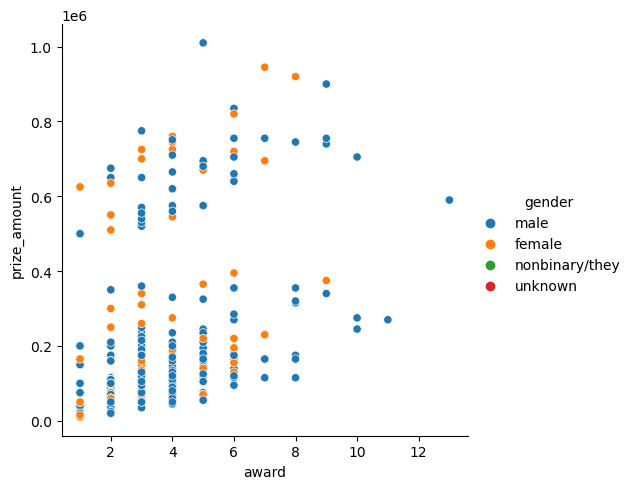

In [257]:
sns.relplot(x='award', y='prize_amount', hue='gender', data=authors1)

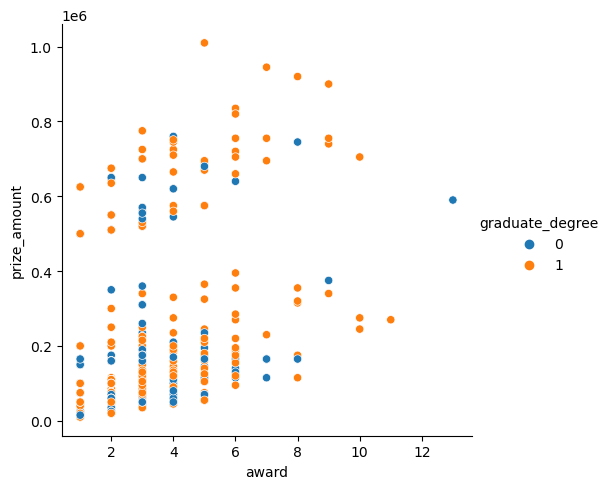

In [258]:
sns.relplot(x='award', y='prize_amount', hue='graduate_degree', data=authors1)

/var/folders/2s/11ldfx_j2c9237b89l98fmdr0000gn/T/ipykernel_56521/3057606200.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(authors1['award'])


<Axes: xlabel='award', ylabel='Density'>

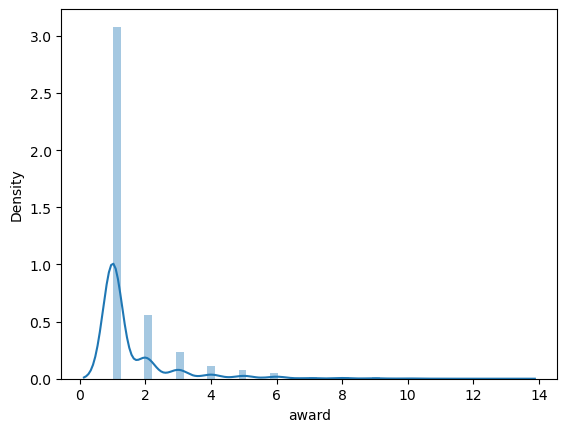

In [259]:
sns.distplot(authors1['award'])

/var/folders/2s/11ldfx_j2c9237b89l98fmdr0000gn/T/ipykernel_56521/2200708557.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(authors1['prize_amount'], bins=5)


<Axes: xlabel='prize_amount', ylabel='Density'>

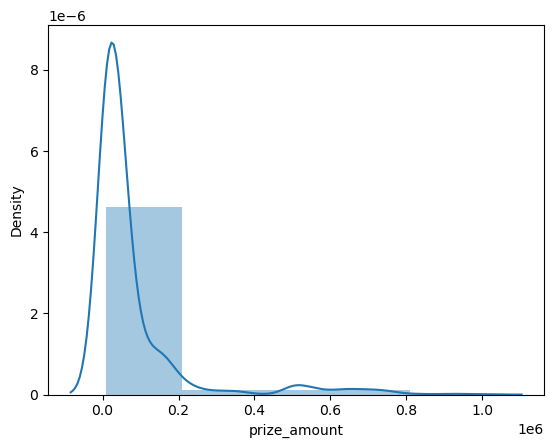

In [260]:
sns.distplot(authors1['prize_amount'], bins=5)